<a href="https://colab.research.google.com/github/tehillamo/GitPlayground4/blob/main/Bert_TextAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
import numpy as np
import pandas as pd

In [10]:
from transformers import pipeline
classifier = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sen_1 = 'mostly ignored others information, I had my goal in mind'
sen_2 = 'Chose based on the majority but still went mostly with stick'


In [ ]:
classifier(sen_1), classifier(sen_2)


([{'label': 'NEGATIVE', 'score': 0.9966641068458557}],
 [{'label': 'NEGATIVE', 'score': 0.6327769756317139}])

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, DistilBertForSequenceClassification, DistilBertTokenizer
import io
from google.colab import files
import pandas as pd
import numpy as numpy

# Defining the Classifier/Pipeline 
--> fine-tune the BERT model
---


Set the pipeline to classify text 

In [15]:
classifier_zero_shot = pipeline('zero-shot-classification')

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


# Experiment 2 - Uploading & saving Data files

Upload the **open question** dataset



In [13]:
uploaded = files.upload()

Saving Exp2_df_open_ques.csv to Exp2_df_open_ques.csv


In [14]:
df_exp_2 = pd.read_csv(io.BytesIO(uploaded['Exp2_df_open_ques.csv']))
#df_exp_2

Upload the **models estimates** dataset


In [16]:
uploaded = files.upload()

Saving Exp2_indiv_weight_dist_maxlike_10.csv to Exp2_indiv_weight_dist_maxlike_10.csv


In [17]:
Exp2_df_weight_resist = pd.read_csv(io.BytesIO(uploaded['Exp2_indiv_weight_dist_maxlike_10.csv']))

Upload the **behaviour** dataset (for the proportion of risk taking for every individual)


In [18]:
uploaded = files.upload()

Saving Exp2_data_behaviour.csv to Exp2_data_behaviour.csv


In [19]:
Exp2_df_behaviour = pd.read_csv(io.BytesIO(uploaded['Exp2_data_behaviour.csv']))

Saving the open questions for: 


1.   Saving the open question for **Q1** (about the **solo** condition) 
2.   Saving the open question for **Q2** (about the **social** condition) 


In [20]:
Exp2_df_q2 = df_exp_2['Q2']
Exp2_df_q1 = df_exp_2['Q1']

# Identification of ***Super Describers***

> **Question 1 - Solo Condition.**

Looking at the responses in the solo condition. Here we are trying to classify who are the participants that have a good ability to describe their strategy that will allow us to map onto their behvaiour. 



1.   Creating an empty dictionary to store all model predictions.

> 1.1. sequences = the free text participants provided for Q1. 

> 1.2. candidate_labels = a list of all the possible labels we used to classify possible strategies for Q1 (risk taking, risk aversion). 

In [21]:
Exp2_Q1_class_out_zero_shot = dict()
for i in range(40):
  Exp2_Q1_class_out_zero_shot[i] = classifier_zero_shot(
    sequences = Exp2_df_q1[i],
    candidate_labels = ["chose jar A", "chose jar B",
                        "stick to jar A", "stick to jar B", "riskier higher reward", 
                        #"more white balls", " more black balls", 
                        "higher value", "get 14","higher chance to get reward", "greater bonus", "get 6",
                        "higher chance to get black ball", "higher chance to get white ball",
                        "jar with the most black", "higher odds of success",
                        "stick", "go for £14 bonus",
                        "how many black and white balls",
                        "correct", "gut feeling", "intuition", #no strategy                         
                        ],
    #candidate_labels = ["use", "did not use"],
    multi_label = True)



2. Storing the output from BERT classifier 


> 2.1. lables = Saving the best predictive label for the sentences given by participants

> 2.2. scores = the prediction score for the best label 
> 2.3. ids = participants' ID








In [22]:
lables = []
scores = []
ids = []
sentences = []
for i in range(40):
    id = df_exp_2['id'][i]
    lable = Exp2_Q1_class_out_zero_shot[i]['labels'][0]
    score = Exp2_Q1_class_out_zero_shot[i]['scores'][0]
    sentence = Exp2_Q1_class_out_zero_shot[i]['sequence']
    ids.append(id)
    lables.append(lable)
    scores.append(score)
    sentences.append(sentence)

# converting lists to arrays    
scores = np.array(scores)
sentences = np.array(sentences)
lables = np.array(lables)
# creating a dataset consisting of 1) IDs, 2) free text, 3) best labels 4)their scores 
Exp2_Q1_scores_and_lables = numpy.column_stack([df_exp_2['id'], sentences, lables, scores])
Exp2_Q1_scores_and_lables =  pd.DataFrame(Exp2_Q1_scores_and_lables, columns = ['id','sentence', 'Lable', 'Score'])
Exp2_Q1_scores_and_lables['id'] = Exp2_Q1_scores_and_lables['id'].astype(float)
Exp2_Q1_scores_and_lables['Score'] = Exp2_Q1_scores_and_lables['Score'].astype(float)

# adding the original behavioural data to the output from the model 
Exp2_df_behaviour['id'] = Exp2_df_behaviour['id'].astype(float)

ind = np.array(Exp2_Q1_scores_and_lables.index)
ind = np.array(ind)[0:]
ind
Exp2_df_behaviour_sub = Exp2_df_behaviour.loc[ind]

Exp2_q1_all = numpy.column_stack([Exp2_df_behaviour_sub['id'], 
                                  Exp2_df_behaviour_sub['meanSolo'], 
                                  Exp2_Q1_scores_and_lables['id'],
                                  Exp2_Q1_scores_and_lables['sentence'],
                                  Exp2_Q1_scores_and_lables['Score'], 
                                  Exp2_Q1_scores_and_lables['Lable']])

Exp2_q1_all = pd.DataFrame(Exp2_q1_all, columns = ['id_behaviour','meanRiskSolo', 'id_text', 'sentence', 'Score', 'Label'])


In [ ]:
# subj_judg = ["none", "most black:risk averse", "num of black balls:none", "num of black balls:none",
#              "correct:none", "higher odds of success:risk averse", "confidence:none", "chance of white balls:risk seeking",
#              "according to grid:none", "stick to B:risk averse", "choose to B:risk averse", "just stick:none", "better chance of rewards:risk averse",
#              "went for 14: risk seeking", "go with higher value:risk seeking", "which jar it came from:none", "random, gut feeling:none", 
#              "num of black balls:none", "guess which jar:none", "how many white balls:risk seeking?", "secure the biggest bonus:risk seeking",
#              "best chance of black ball:risk averse", "I always tried to draw a ball from urn 1:risk seeking", "intuition:none", "sticking even on Jar A because the potential prize was bigger:risk seeking",
#             "choose from Jar B:risk averse","get the 14 ball:risk seeking", "always wanted 14: risk seeking", "weighted each colour:none", "gut feeling", "number of each colour:none",
#              "greater chance of obtaining a reward, 6: risk averse", "number of each colour:none", "none", "based on amount in each jar:none", "weighted each colour:none",
#              "compare how many black:none", "looking at the picks:none", "based on greater chance of the black ball coming from pot B:risk averse", "whichever had the best odds"]
# Exp2_Q1_scores_and_lables['subj_text_analysis'] = subj_judg

#Exp2_Q1_scores_and_lables = Exp2_Q1_scores_and_lables[Exp2_Q1_scores_and_lables['Score']>.7]


In [ ]:
#Exp2_q1_all = Exp2_q1_all[(Exp2_q1_all['id_text'] != 13987.0 ) & (Exp2_q1_all['id_text'] != 49865.0) & (Exp2_q1_all['id_text'] != 50625.0) & (Exp2_q1_all['id_text'] != 57379.0) & (Exp2_q1_all['id_text'] != 57478.0) & (Exp2_q1_all['id_text'] != 70064.0) & (Exp2_q1_all['id_text'] != 83549.0) & (Exp2_q1_all['id_text'] != 89063.0) & (Exp2_q1_all['id_text'] != 93818.0) & (Exp2_q1_all['id_text'] != 98074.0)]

3.*Exclusion*

In [23]:
# initial sample size = 40
len(Exp2_q1_all['Score'])

40

> 3.1. **Step 1** - exclusion of strategies that cannot be identified as meaningful (that can explain any behvaiour comparable to the model. For example, 'corretc' or 'by how many black and white balls' )






In [24]:
from pandas.tseries.frequencies import unique
Exp2_q1_all = Exp2_q1_all[Exp2_q1_all['Label'] != "correct"] # resulted in exclusion of 4 indivisuals 
Exp2_q1_all = Exp2_q1_all[Exp2_q1_all['Label'] !=  "how many black and white balls"] # resulted in exclusion of 5 indivisuals 


In [25]:
# Step 1 -> sample size = 31
len(Exp2_q1_all['Score'])

31

In [26]:
#unique labels 
unique(Exp2_q1_all['Label'])

array(['jar with the most black', 'higher chance to get reward',
       'higher chance to get white ball', 'stick to jar B',
       'higher chance to get black ball', 'greater bonus', 'higher value',
       'intuition', 'gut feeling', 'riskier higher reward',
       'go for £14 bonus', 'stick', 'get 6', 'higher odds of success'],
      dtype=object)

Assign **risk preferences** to the different lables. For example: 'jar with the most black' meant that the individual was aiming to chose from the jar with most black balls (i.e., the safer jar) and hence will be classified as risk averse. 

In [27]:
ind = np.array(Exp2_q1_all.index)
ind = np.array(ind)[0:]

classes_risk_from_text = list()

for i in ind:
  if(Exp2_q1_all['Label'][i] == 'jar with the most black' or Exp2_q1_all['Label'][i] == 'stick to jar B' or Exp2_q1_all['Label'][i] == 'higher chance to get black ball' or Exp2_q1_all['Label'][i] == 'higher odds of success' or Exp2_q1_all['Label'][i] == "get 6"):
      classes_risk_from_text.append("risk averse")
      Exp2_q1_all['Score'][i] = 1- Exp2_q1_all['Score'][i]
  if (Exp2_q1_all['Label'][i] == 'riskier higher reward' or Exp2_q1_all['Label'][i] == 'greater bonus' or Exp2_q1_all['Label'][i] == 'higher chance to get reward' or Exp2_q1_all['Label'][i] == 'higher chance to get white ball' or Exp2_q1_all['Label'][i] == 'higher value' or Exp2_q1_all['Label'][i] == 'get 14' or Exp2_q1_all['Label'][i] == "go for £14 bonus"):
      classes_risk_from_text.append("risk seeking")
  if (Exp2_q1_all['Label'][i] == "gut feeling" or Exp2_q1_all['Label'][i] == "intuition" or Exp2_q1_all['Label'][i] == "stick"):
      classes_risk_from_text.append("none")

#creating a new column that includes the new classification 
Exp2_q1_all['newcol'] = classes_risk_from_text

> 3.2. **Step 2** - 
Inclusion of individuals according to their quality in description. 

- If individuals that were classified with a lable that describes a 'risk averse' and indeed took risk less than .5 are included 
- If individuals that were classified with a lable that describes a 'risk seeking' and indeed took risk more than .5 are included 
-  If individuals that were classified with a lable that describes a 'none' and indeed took risk around .5 are included. 

In [ ]:
#Exp2_q1_all = Exp2_q1_all[Exp2_q1_all['newcol'] != "none"]

In [28]:
Exp2_q1_all_sub = Exp2_q1_all[(Exp2_q1_all['newcol'] == "risk averse") & (Exp2_q1_all['meanRiskSolo'] < .5) | (Exp2_q1_all['newcol'] == "risk seeking") & (Exp2_q1_all['meanRiskSolo'] > .5) | (Exp2_q1_all['newcol'] == "none") & ((Exp2_q1_all['meanRiskSolo'] <= .55) & (Exp2_q1_all['meanRiskSolo'] > .45))]


In [29]:
# Step 2 -> sample size = 19 ('super' descibers)
len(Exp2_q1_all_sub['Label'])

19

In [30]:
# the row names for the included individuals 
Exp2_q1_all_sub.index # 1, 5, 9, 10, 11, 13, 14, 18, 21, 22, 23, 25, 26, 27, 29, 35, 36, 38, 39

Int64Index([1, 5, 9, 10, 11, 13, 14, 18, 21, 22, 23, 25, 26, 27, 29, 35, 36,
            38, 39],
           dtype='int64')

# Experiment 3 - Uploading & saving Data files


Upload the **open question** dataset

In [31]:
uploaded = files.upload()

Saving Exp3_df_open_ques.csv to Exp3_df_open_ques.csv


In [32]:
df_exp_3 = pd.read_csv(io.BytesIO(uploaded['Exp3_df_open_ques.csv']))


Upload the **model estimates** dataset


In [33]:
uploaded = files.upload()

Saving Exp3_Indiv_Model_compare.csv to Exp3_Indiv_Model_compare.csv


In [34]:
Exp3_df_weight_resist = pd.read_csv(io.BytesIO(uploaded['Exp3_Indiv_Model_compare.csv']))

Upload the **behaviour** dataset


In [35]:
uploaded = files.upload()

Saving Exp3_data_behaviour.csv to Exp3_data_behaviour.csv


In [36]:
Exp3_df_behaviour = pd.read_csv(io.BytesIO(uploaded['Exp3_data_behaviour.csv']))

Saving the open questions for: 


1.   Saving the open question for **Q1** (about the **solo** condition) 
2.   Saving the open question for **Q2** (about the **social** condition) 

In [37]:
Exp3_df_q2 = df_exp_3['Q2']
Exp3_df_q1 = df_exp_3['Q1']

# **Question 1** 
**Solo Condition.**

`Looking at the responses in the solo condition. Here we are trying to classify who are the participants that have a good ability to describe their strategy that will allow us to map onto their behvaiour. `

Creating an empty dictionary to store all model predictions.
> 1.1. sequences = the free text participants provided for Q1. 

> 1.2. candidate_labels = a list of all the possible labels we used to classify possible strategies for Q1 (risk taking, risk aversion).

changesss


In [38]:
Exp3_Q1_class_out_zero_shot = dict()
for i in range(41):
  Exp3_Q1_class_out_zero_shot[i] = classifier_zero_shot(
    sequences = Exp3_df_q1[i],
    candidate_labels = ["chose jar A", "chose from jar a", "odds of white", "likelihood to get white ball",
                        "chose jar B", "chose from jar b", "jar with the most black","odds of black", "likelihood to get black ball", 
                        "stick to jar A", "stick to jar B", 
                        "riskier higher reward", 
                         "higher value", "get 14","higher chance to get reward", "greater bonus", "higher chance to get white ball",
                        "get 6","go for £14 bonus",
                        "higher chance to get black ball", 
                         "higher odds of success",
                        "chose to stick", "chose to switch",
                        "how many black and white balls",
                        "correct", "gut feeling", "intuition", #no strategy                         
                        ],
    multi_label = True)

2. Storing the output from BERT classifier 

> 2.1. lables = Saving the best predictive label for the sentences given by participants

> 2.2. scores = the prediction score for the best label 

> 2.3. ids = participants' ID


In [ ]:
lables = []
scores = []
ids = []
sentences = []
for i in range(41):
    id = df_exp_3['id'][i]
    lable = Exp3_Q1_class_out_zero_shot[i]['labels'][0]
    score = Exp3_Q1_class_out_zero_shot[i]['scores'][0]
    sentence = Exp3_Q1_class_out_zero_shot[i]['sequence']
    ids.append(id)
    lables.append(lable)
    scores.append(score)
    sentences.append(sentence)

# converting lists to arrays    
scores = np.array(scores)
sentences = np.array(sentences)
lables = np.array(lables)

# creating a dataset consisting of 1) IDs, 2) free text, 3) best labels 4)their scores 
Exp3_Q1_scores_and_lables = numpy.column_stack([df_exp_3['id'], sentences, lables, scores])
Exp3_Q1_scores_and_lables =  pd.DataFrame(Exp3_Q1_scores_and_lables, columns = ['id','sentence', 'Lable', 'Score'])
Exp3_Q1_scores_and_lables['id'] = Exp3_Q1_scores_and_lables['id'].astype(float)
Exp3_Q1_scores_and_lables['Score'] = Exp3_Q1_scores_and_lables['Score'].astype(float)

# # 
# Exp3_df_behaviour['id'] = Exp3_df_behaviour['id'].astype(float)

# ind = np.array(Exp3_Q1_scores_and_lables.index)
# ind = np.array(ind)[0:]
# ind
# Exp3_df_behaviour_sub = Exp3_df_behaviour.loc[ind]



# adding the original behavioural data to the output from the model 
Exp3_df_behaviour['id'] = Exp3_df_behaviour['id'].astype(float)

# combine all information into one dataframe 
Exp3_q1_all = numpy.column_stack([Exp3_df_behaviour['id'], 
                                  Exp3_df_behaviour['meanSolo'], 
                                  Exp3_Q1_scores_and_lables['id'],
                                  Exp3_Q1_scores_and_lables['sentence'],
                                  Exp3_Q1_scores_and_lables['Score'], 
                                  Exp3_Q1_scores_and_lables['Lable']]) 

Exp3_q1_all = pd.DataFrame(Exp3_q1_all, columns = ['id_behaviour','meanRiskSolo', 'id_text', 'sentence', 'Score', 'Label'])

In [ ]:
# initial sample size: N = 41 
len(Exp3_q1_all['Label'])

41

3.  Exclusion



> 3.1. **Step 1** - exclusion of strategies that cannot be identified as meaningful (that can explain any behvaiour comparable to the model. For example, 'corretc' or 'by how many black and white balls' )

In [ ]:
from pandas.tseries.frequencies import unique
Exp3_q1_all = Exp3_q1_all[Exp3_q1_all['Label'] != "correct"] # 4 individuals were excluded 
Exp3_q1_all = Exp3_q1_all[Exp3_q1_all['Label'] !=  "how many black and white balls"] # 1 individuals were excluded 

In [ ]:
# Step 1 -> N = 36 
len(Exp3_q1_all['Label'])

36

In [ ]:
# Looking at the unique lables left  
unique(Exp3_q1_all['Label'])

array(['get 6', 'higher odds of success', 'stick to jar B',
       'chose to stick', 'go for £14 bonus', 'jar with the most black',
       'chose jar B', 'odds of black', 'likelihood to get black ball',
       'higher chance to get black ball', 'gut feeling',
       'likelihood to get white ball', 'chose to switch', 'higher value',
       'higher chance to get reward', 'chose from jar b',
       'riskier higher reward'], dtype=object)

In [ ]:
Exp3_q1_all.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18,
            19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 35, 36, 37,
            38, 40],
           dtype='int64')

Assign **risk preferences** to the different lables. For example: 'jar with the most black' meant that the individual was aiming to chose from the jar with most black balls (i.e., the safer jar) and hence will be classified as risk averse. 

In [ ]:
exp3_classes_risk_from_text = list()

for i in Exp3_q1_all.index:
  print(i)
  if(Exp3_q1_all['Label'][i] == 'chose from jar b' or Exp3_q1_all['Label'][i] == 'chose jar B' or Exp3_q1_all['Label'][i] == 'odds of black' or Exp3_q1_all['Label'][i] == 'jar with the most black' or Exp3_q1_all['Label'][i] == 'stick to jar B' or Exp3_q1_all['Label'][i] == 'higher chance to get black ball' or Exp3_q1_all['Label'][i] == 'higher odds of success' or Exp3_q1_all['Label'][i] == 'get 6' or Exp3_q1_all['Label'][i] == 'likelihood to get black ball'):
      exp3_classes_risk_from_text.append("risk averse")
      Exp3_q1_all['Score'][i] = 1- Exp3_q1_all['Score'][i]
  if (Exp3_q1_all['Label'][i] == 'riskier higher reward' or Exp3_q1_all['Label'][i] == 'greater bonus' or Exp3_q1_all['Label'][i] == 'higher chance to get reward' or Exp3_q1_all['Label'][i] == 'higher chance to get white ball' or Exp3_q1_all['Label'][i] == 'higher value' or Exp3_q1_all['Label'][i] == 'get 14' or Exp3_q1_all['Label'][i] == "go for £14 bonus" or Exp3_q1_all['Label'][i] == "likelihood to get white ball"):
      exp3_classes_risk_from_text.append("risk seeking")
  if (Exp3_q1_all['Label'][i] == 'gut feeling' or Exp3_q1_all['Label'][i] == 'chose to switch' or Exp3_q1_all['Label'][i] == 'chose to stick'):
      exp3_classes_risk_from_text.append("none")

In [ ]:
Exp3_q1_all['newcol'] = exp3_classes_risk_from_text

> 3.2. **Step 2** - 
Inclusion of individuals according to their quality in description. 

- If individuals that were classified with a lable that describes a 'risk averse' and indeed took risk less than .5 are included 
- If individuals that were classified with a lable that describes a 'risk seeking' and indeed took risk more than .5 are included 
-  If individuals that were classified with a lable that describes a 'none' and indeed took risk around .5 are included. 

In [ ]:
Exp3_q1_all_sub = Exp3_q1_all[(Exp3_q1_all['newcol'] == "risk averse") & (Exp3_q1_all['meanRiskSolo'] < .5) | (Exp3_q1_all['newcol'] == "risk seeking") & (Exp3_q1_all['meanRiskSolo'] > .5) |(Exp3_q1_all['newcol'] == "none") & ((Exp3_q1_all['meanRiskSolo'] <= .55) & (Exp3_q1_all['meanRiskSolo'] > .45))]


In [ ]:
# step 2 -> N = 20
len(Exp3_q1_all_sub['Label'])

20

In [ ]:
Exp3_q1_all_sub.index # 0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 13, 14, 15, 18, 23, 25, 27, 29, 35,38

Int64Index([0, 1, 2, 3, 5, 6, 7, 8, 10, 11, 13, 14, 15, 18, 23, 25, 27, 29, 35,
            38],
           dtype='int64')

In [ ]:
# Exp2_q1_all_sub = Exp2_q1_all_sub[['id_behaviour', 'meanRiskSolo', 'id_text', 'sentence', 'Score', 'Label']]
# Exp2_q1_all_sub.head(n=15)


# The Relationship between Social Strategy Description & Model Estimates 

(only for ***Super Describers*** from Q1) 

# **QUESTION - 2**

## **Experiment 2**

1. Looking at the responses in the social condition. Here we are trying to classify who are the participants that had a good ability to describe their strategy in Q1 (solo condition) that will allow us to map their strategy descriptions and their individual model estimates.

Creating an empty dictionary to store all model predictions.
> 1.1. sequences = the free text participants provided for Q1. 

> 1.2. candidate_labels = a list of all the possible labels we used to classify possible strategies for Q1 (risk taking, risk aversion).



In [ ]:
Exp2_class_out_zero_shot = dict()

for i in range(40):
  Exp2_class_out_zero_shot[i] = classifier_zero_shot(
    sequences = Exp2_df_q2[i],
    candidate_labels = ["influenced by", "did not influence me", "sometimes influenced me", "often influenced me",
                        "used the others", "did not use the others", "sometimes used the others", "often used the others",
                        "care about majority", "did not care about the majority", "sometimes cared about majority", "often cared about majority",
                        "care about others", "did not care about others", "sometimes cares about others", "often cares about others"],
    #candidate_labels = ["use", "did not use"],
    multi_label = True)


In [ ]:
Exp2_df_weight = Exp2_df_weight_resist[['Weight_Dist', 'id']]
Exp2_df_weight

2. Storing the output from BERT classifier 

> 2.1. lables = Saving the best predictive label for the sentences given by participants

> 2.2. scores = the prediction score for the best label 
> 2.3. ids = participants' ID

In [ ]:
Exp2_lables = []
Exp2_scores = []
Exp2_ids = []
Exp2_sentences = []
for i in range(40):
    id = df_exp_2['id'][i]
    lable = Exp2_class_out_zero_shot[i]['labels'][0]
    score = Exp2_class_out_zero_shot[i]['scores'][0]
    sentence = Exp2_class_out_zero_shot[i]['sequence']
    #print(ids, lables, scores)
    Exp2_ids.append(id)
    Exp2_lables.append(lable)
    Exp2_scores.append(score)
    Exp2_sentences.append(sentence)
Exp2_scores = np.array(Exp2_scores)
Exp2_sentences = np.array(Exp2_sentences)
Exp2_ids = np.array(Exp2_ids)

import numpy as numpy

Exp2_scores_and_lables = numpy.column_stack([Exp2_ids, Exp2_sentences, Exp2_lables, Exp2_scores])
Exp2_scores_and_lables =  pd.DataFrame(Exp2_scores_and_lables, columns = ['id','sentence', 'Lable', 'Score'])
Exp2_scores_and_lables['id'] = Exp2_scores_and_lables['id'].astype(float)
Exp2_df_behaviour['dist_risk'] = Exp2_df_behaviour['dist_risk'].astype(float)

Exp2_scores_and_lables = numpy.column_stack([Exp2_scores, Exp2_lables, 
                                             Exp2_scores_and_lables['id'], 
                                             Exp2_df_weight_resist['Weight_Dist'], 
                                             #Exp2_df_weight_resist['social_info_resistance'], 
                                             Exp2_df_weight_resist['id'], 
                                             Exp2_df_behaviour['dist_risk']])

Exp2_scores_and_lables = pd.DataFrame(Exp2_scores_and_lables, columns = ['Score',
                                                                         'Lable', 
                                                                         'id_score', 
                                                                         'weightDist', 
                                                                         #'ResistBayes', 
                                                                         'id_modeling', 
                                                                         'behaviour_dist'])


In [ ]:
# Convert the neccesary columns 
#Exp2_scores_and_lables = Exp2_scores_and_lables.sort_values(by=['id'])
Exp2_scores_and_lables['behaviour_dist'] = Exp2_scores_and_lables['behaviour_dist'].astype(float)
Exp2_scores_and_lables['behaviour_dist'] = abs(Exp2_scores_and_lables['behaviour_dist'])
#scores_and_lables['Lable']
Exp2_scores_and_lables['Score'] = Exp2_scores_and_lables['Score'].astype(float)
#Exp2_scores_and_lables['ResistBayes'] = Exp2_scores_and_lables['ResistBayes'].astype(float)
Exp2_scores_and_lables['weightDist'] = Exp2_scores_and_lables['weightDist'].astype(float)
Exp2_scores_and_lables['behaviour_dist'] = Exp2_scores_and_lables['behaviour_dist'].astype(float)
Exp2_scores_and_lables['behaviour_dist']  = abs(Exp2_scores_and_lables['behaviour_dist'])

In [ ]:
unique(Exp2_scores_and_lables['Lable'])

array(['sometimes influenced me', 'did not influence me', 'influenced by',
       'did not care about the majority', 'often cared about majority',
       'sometimes used the others', 'did not care about others',
       'did not use the others'], dtype=object)

3. Conversion of the labels scores into ranked-ordered scores.


> - If the individuals' best lable indicated that they beleived to have **not paid attention to otehrs' choices**, we wanted to convert it into a **low weight**. We, therefore substracted the high label from 1 (i.e., the maximum level of accuracy. most of the accuracy labels are around .9)

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices**, we left the accuracy as **high** as its models accuracy score. 

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices sometimes**, we wanted to convert it into a **mid weight**. We, therefore substracted .5 from their label accuracy as "sometimes" is about half of the time. 

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices often**, we wanted to convert it into a **relatively high weight**. We, therefore substracted .2 from their label accuracy as "often" is about .8 of the time. 


In [ ]:
#for i in ind:
for i in range(40):
  if Exp2_scores_and_lables['Lable'][i] == 'did not care about others' or Exp2_scores_and_lables['Lable'][i] == 'did not care about the majority' or Exp2_scores_and_lables['Lable'][i] == 'did not influence me' or Exp2_scores_and_lables['Lable'][i] == 'did not use the others':
     Exp2_scores_and_lables['Score'][i] = 1 - Exp2_scores_and_lables['Score'][i]
  if Exp2_scores_and_lables['Lable'][i] == Exp2_scores_and_lables['Lable'][i] == 'sometimes influenced me' or Exp2_scores_and_lables['Lable'][i] == 'sometimes used the others':
      Exp2_scores_and_lables['Score'][i] = Exp2_scores_and_lables['Score'][i] - .5
  if Exp2_scores_and_lables['Lable'][i] == 'often cared about majority':
    Exp2_scores_and_lables['Score'][i] = Exp2_scores_and_lables['Score'][i] - .2


In [ ]:
#Desc_Beha = Exp2_scores_and_lables['Score'] - Exp2_scores_and_lables['behaviour_dist']
# Exp2_Data_full = numpy.column_stack([Exp2_scores_and_lables, Exp2_sentences])
# Exp2_Data_full = pd.DataFrame(Exp2_Data_full, columns = ['Score','Lable', 
#                                                'id_score', 
#                                                'weightDist', 
#                                                'ResistBayes', 
#                                                'id_modeling', 
#                                                #'behaviour_dist', 
#                                                'diff_descr_behaviour', 
#                                                'strategy_desc'])

Choosing **only the 'super describers'** from the Solo Condition



In [ ]:
Exp2_Q1_super_describers = Exp2_q1_all_sub.index
Exp2_scores_and_lables = Exp2_scores_and_lables.loc[Exp2_Q1_super_describers]

In [ ]:
Exp2_scores_and_lables.head(n=10)

## **Experiment 3**

1. Looking at the responses in the social condition. Here we are trying to classify who are the participants that had a good ability to describe their strategy in Q1 (solo condition) that will allow us to map their strategy descriptions and their individual model estimates.

Creating an empty dictionary to store all model predictions.
> 1.1. sequences = the free text participants provided for Q1. 

> 1.2. candidate_labels = a list of all the possible labels we used to classify possible strategies for Q1 (risk taking, risk aversion).



In [ ]:
Exp3_class_out_zero_shot = dict()

for i in range(41):
  Exp3_class_out_zero_shot[i] = classifier_zero_shot(
    sequences = Exp3_df_q2[i],
    candidate_labels = ["influenced by", "did not influence me", "sometimes influenced me", "often influenced me",
                        "used the others", "did not use the others", "sometimes used the others", "often used the others",
                        "care about majority", "did not care about the majority", "sometimes cared about majority", "often cared about majority",
                        "care about others", "did not care about others", "sometimes cares about others", "often cares about others"],
    #candidate_labels = ["use", "did not use"],
    multi_label = True)

In [ ]:
Exp3_df_weight = Exp3_df_weight_resist[['Weight_Dist', 'id']]
Exp3_df_weight

2. Storing the output from BERT classifier 

> 2.1. lables = Saving the best predictive label for the sentences given by participants

> 2.2. scores = the prediction score for the best label 
> 2.3. ids = participants' ID

In [ ]:
Exp3_lables = []
Exp3_scores = []
Exp3_ids = []
Exp3_sentences = []
for i in range(41):
    id = df_exp_3['id'][i]
    lable = Exp3_class_out_zero_shot[i]['labels'][0]
    score = Exp3_class_out_zero_shot[i]['scores'][0]
    sentence = Exp3_class_out_zero_shot[i]['sequence']
    #print(ids, lables, scores)
    Exp3_ids.append(id)
    Exp3_lables.append(lable)
    Exp3_scores.append(score)
    Exp3_sentences.append(sentence)
Exp3_scores = np.array(Exp3_scores)
Exp3_sentences = np.array(Exp3_sentences)
Exp3_ids = np.array(Exp3_ids)

import numpy as numpy

Exp3_scores_and_lables = numpy.column_stack([Exp3_ids, Exp3_sentences, Exp3_lables, Exp3_scores])
Exp3_scores_and_lables =  pd.DataFrame(Exp3_scores_and_lables, columns = ['id','sentence', 'Lable', 'Score'])
Exp3_scores_and_lables['id'] = Exp3_scores_and_lables['id'].astype(float)
Exp3_df_behaviour['dist_risk'] = Exp3_df_behaviour['dist_risk'].astype(float)

Exp3_scores_and_lables = numpy.column_stack([Exp3_scores, Exp3_lables, 
                                             Exp3_scores_and_lables['id'], 
                                             Exp3_df_weight_resist['Weight_Dist'], 
                                             #Exp2_df_weight_resist['social_info_resistance'], 
                                             Exp3_df_weight_resist['id'], 
                                             Exp3_df_behaviour['dist_risk']])

Exp3_scores_and_lables = pd.DataFrame(Exp3_scores_and_lables, columns = ['Score',
                                                                         'Lable', 
                                                                         'id_score', 
                                                                         'weightDist', 
                                                                         #'ResistBayes', 
                                                                         'id_modeling', 
                                                                         'behaviour_dist'])

In [ ]:
#Exp2_scores_and_lables = Exp2_scores_and_lables.sort_values(by=['id'])
Exp3_scores_and_lables['behaviour_dist'] = Exp3_scores_and_lables['behaviour_dist'].astype(float)
Exp3_scores_and_lables['behaviour_dist'] = abs(Exp3_scores_and_lables['behaviour_dist'])

#scores_and_lables['Lable']
Exp3_scores_and_lables['Score'] = Exp3_scores_and_lables['Score'].astype(float)
#Exp2_scores_and_lables['ResistBayes'] = Exp2_scores_and_lables['ResistBayes'].astype(float)
Exp3_scores_and_lables['weightDist'] = Exp3_scores_and_lables['weightDist'].astype(float)
Exp3_scores_and_lables['behaviour_dist'] = Exp3_scores_and_lables['behaviour_dist'].astype(float)
Exp3_scores_and_lables['behaviour_dist']  = abs(Exp3_scores_and_lables['behaviour_dist'])

3. Conversion of the labels scores into ranked-ordered scores.


> - If the individuals' best lable indicated that they beleived to have **not paid attention to otehrs' choices**, we wanted to convert it into a **low weight**. We, therefore substracted the high label from 1 (i.e., the maximum level of accuracy. most of the accuracy labels are around .9)

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices**, we left the accuracy as **high** as its models accuracy score. 

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices sometimes**, we wanted to convert it into a **mid weight**. We, therefore substracted .5 from their label accuracy as "sometimes" is about half of the time. 

> - If the individuals' best lable indicated that they beleived to **have paid attention to otehrs' choices often**, we wanted to convert it into a **relatively high weight**. We, therefore substracted .2 from their label accuracy as "often" is about .8 of the time. 


In [ ]:
#for i in ind:
for i in range(41):
  if Exp3_scores_and_lables['Lable'][i] == 'did not care about others' or Exp3_scores_and_lables['Lable'][i] == 'did not care about the majority' or Exp3_scores_and_lables['Lable'][i] == 'did not influence me' or Exp3_scores_and_lables['Lable'][i] == 'did not use the others':
     Exp3_scores_and_lables['Score'][i] = 1 - Exp3_scores_and_lables['Score'][i]
  if Exp3_scores_and_lables['Lable'][i] == Exp3_scores_and_lables['Lable'][i] == 'sometimes influenced me' or Exp3_scores_and_lables['Lable'][i] == 'sometimes used the others':
      Exp3_scores_and_lables['Score'][i] = Exp3_scores_and_lables['Score'][i] - .5
  if Exp3_scores_and_lables['Lable'][i] == 'often cared about majority':
    Exp3_scores_and_lables['Score'][i] = Exp3_scores_and_lables['Score'][i] - .2

Choosing **only the 'super describers'** from the Solo Condition

In [ ]:
Exp3_Q1_super_describers = Exp3_q1_all_sub.index
Exp3_scores_and_lables = Exp3_scores_and_lables.loc[Exp3_Q1_super_describers]

# Combine Data of Super Describers From Both Experiments

In [ ]:
both_data = [Exp3_scores_and_lables, Exp2_scores_and_lables]

In [ ]:
df_all_exp = pd.concat(both_data)

In [ ]:
df_all_exp.head(n=40)

In [ ]:
len(df_all_exp['Lable'])

39

# Plotting & Statistical Results 

0.0947
0.5662


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

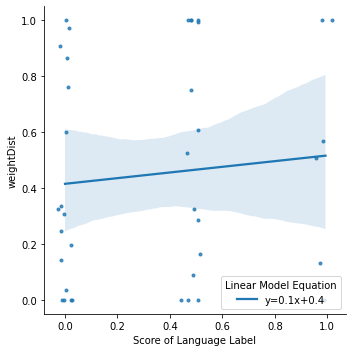

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from google.colab import files



#extract correlation coefficient (rounded to 4 decimal places)
r_full = round(pearsonr(df_all_exp['Score'], df_all_exp['weightDist'])[0], 4)
#r_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[0], 4)
print(r_full)

#extract p-value (rounded to 4 decimal places) 
p_full = round(pearsonr(df_all_exp['Score'], df_all_exp['weightDist'])[1], 4)
#p_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[1], 4)
print(p_full) 


N = len(df_all_exp.index[0:])
colors = np.random.rand(N)

# plt.scatter(df_all_exp['Score'], df_all_exp['weightDist'], s=110,c=colors, alpha=0.2)
# plt.title("Experiment 2 \n Language Model Output & Distance Model Individual Estimate")
# plt.xlabel("Strategy Score")
# plt.ylabel("Estimated Beta - Distance Model")
# #plt.annotate('correlation = .52 \n p-value = .022 \n N = 19', xy=(.3, .1))
# # plt.savefig('Exp_2.png',dpi=300)
# # files.download("Exp_2.png") 
# plt.show()


import numpy as np, pandas as pd; 
import seaborn as sns;
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df_all_exp['Score'],df_all_exp['weightDist'])

ax = sns.lmplot(data = df_all_exp, x = 'Score', y = 'weightDist', 
           markers=["."], palette="Set1", x_jitter = .03, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}) 
plt.xlabel('Score of Language Label')
plt.legend(title='Linear Model Equation', loc='lower right', labels=["y={0:.1f}x+{1:.1f}".format(slope,intercept)])
plt.savefig('Full_linearModel.png',dpi=300)
files.download("Full_linearModel.png") 
plt.show(ax)


In [ ]:
df_all_sub = df_all_exp[df_all_exp['Score'] - df_all_exp['behaviour_dist'] < .25]

In [ ]:
# exracting only those who were super describers from Q1 AND Q2
len(df_all_sub['Lable'])

21

0.5878
0.0051


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

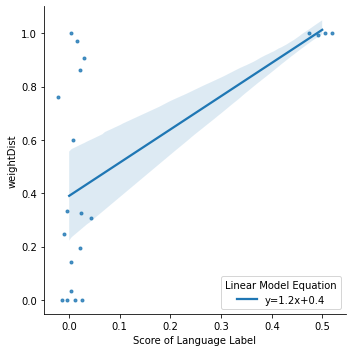

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from google.colab import files
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#extract correlation coefficient (rounded to 4 decimal places)
r_full = round(pearsonr(df_all_sub['Score'], df_all_sub['weightDist'])[0], 4)
#r_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[0], 4)
print(r_full)

#extract p-value (rounded to 4 decimal places) 
p_full = round(pearsonr(df_all_sub['Score'], df_all_sub['weightDist'])[1], 4)
#p_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[1], 4)
print(p_full) 


N = len(df_all_sub.index[0:])
colors = np.random.rand(N)

# plt.scatter(df_all_sub['Score'], df_all_sub['weightDist'], s=110,c=colors, alpha=0.2)
# plt.title("Experiment 2 \n Language Model Output & Distance Model Individual Estimate")
# plt.xlabel("Strategy Score")
# plt.ylabel("Estimated Beta - Distance Model")
# #plt.annotate('correlation = .52 \n p-value = .022 \n N = 19', xy=(.3, .1))
# # plt.savefig('Exp_2.png',dpi=300)
# # files.download("Exp_2.png") 
# plt.show()

import numpy as np, pandas as pd; 
import seaborn as sns;
import matplotlib.pyplot as plt
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(df_all_sub['Score'],df_all_sub['weightDist'])

ax = sns.lmplot(data = df_all_sub, x = 'Score', y = 'weightDist', 
           markers=["."], palette="Set1", x_jitter = .03, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}) 
plt.xlabel('Score of Language Label')
plt.legend(title='Linear Model Equation', loc='lower right', labels=["y={0:.1f}x+{1:.1f}".format(slope,intercept)])
plt.savefig('Sub_linearModel.png',dpi=300)
files.download("Sub_linearModel.png") 
plt.show(ax)




-0.0488
0.8429


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

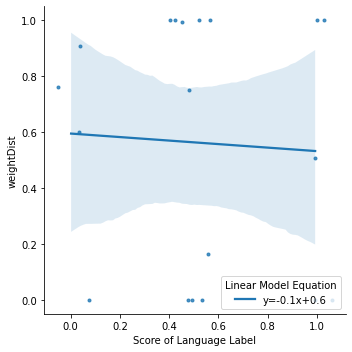

In [ ]:

#extract correlation coefficient (rounded to 4 decimal places)
exp2_r_fullest = round(pearsonr(Exp2_scores_and_lables['weightDist'], Exp2_scores_and_lables['Score'])[0], 4)
#r_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[0], 4)
print(exp2_r_fullest)

#extract p-value (rounded to 4 decimal places) 
exp2_p_fullest = round(pearsonr(Exp2_scores_and_lables['weightDist'], Exp2_scores_and_lables['Score'])[1], 4)
#p_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[1], 4)
print(exp2_p_fullest) 


N = len(Exp2_scores_and_lables.index[0:])
colors = np.random.rand(N)

slope, intercept, r_value, p_value, std_err = stats.linregress(Exp2_scores_and_lables['Score'],Exp2_scores_and_lables['weightDist'])

ax = sns.lmplot(data = Exp2_scores_and_lables, x = 'Score', y = 'weightDist', 
           markers=["."], palette="Set1", x_jitter = .09, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}) 
plt.xlabel('Score of Language Label')
plt.legend(title='Linear Model Equation', loc='lower right', labels=["y={0:.1f}x+{1:.1f}".format(slope,intercept)])
plt.savefig('NoFiltering_linearModel.png',dpi=300)
files.download("NoFiltering_linearModel.png") 
plt.show(ax)


0.0245
0.9183


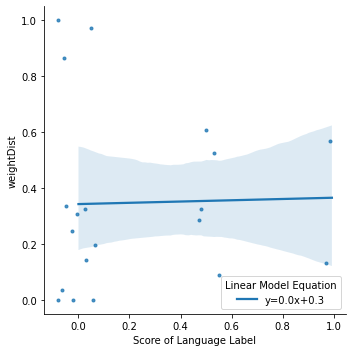

In [ ]:

#extract correlation coefficient (rounded to 4 decimal places)
exp3_r_fullest = round(pearsonr(Exp3_scores_and_lables['weightDist'], Exp3_scores_and_lables['Score'])[0], 4)
#r_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[0], 4)
print(exp3_r_fullest)

#extract p-value (rounded to 4 decimal places) 
exp3_p_fullest = round(pearsonr(Exp3_scores_and_lables['weightDist'], Exp3_scores_and_lables['Score'])[1], 4)
#p_bayes = round(pearsonr(Exp2_scores_and_lables['Score'], Exp2_scores_and_lables['ResistBayes'])[1], 4)
print(exp3_p_fullest) 


N = len(Exp3_scores_and_lables.index[0:])
colors = np.random.rand(N)

slope, intercept, r_value, p_value, std_err = stats.linregress(Exp3_scores_and_lables['Score'],Exp3_scores_and_lables['weightDist'])

ax = sns.lmplot(data = Exp3_scores_and_lables, x = 'Score', y = 'weightDist', 
           markers=["."], palette="Set1", x_jitter = .09, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)}) 
plt.xlabel('Score of Language Label')
plt.legend(title='Linear Model Equation', loc='lower right', labels=["y={0:.1f}x+{1:.1f}".format(slope,intercept)])
plt.show(ax)


---
Bayesian Model - & - Text
---

